In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\ML_2024\ML_2024\Spam Classifier\spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5063,ham,I dunno lei... Like dun haf...,NaN,NaN,NaN
5464,ham,I will treasure every moment we spend together...,NaN,NaN,NaN
1533,ham,Horrible bf... I now v hungry...,NaN,NaN,NaN
332,spam,Call Germany for only 1 pence per minute! Call...,NaN,NaN,NaN
4831,ham,Rats. Hey did u ever vote for the next themes?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#Drop last 3 columns as they are mostly nulls
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
146,spam,FreeMsg Why haven't you replied to my text? I'...
215,ham,Finally the match heading towards draw as your...
321,ham,Hey... Why dont we just go watch x men and hav...
34,spam,Thanks for your subscription to Ringtone UK yo...
4842,ham,I need details about that online job.


In [10]:
#Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5421,ham,"Hi elaine, is today's meeting confirmed?"
4429,ham,Yar lor... How u noe? U used dat route too?
3699,ham,Oh...i asked for fun. Haha...take care. Ì_
3725,ham,No chikku nt yet.. Ya i'm free
5405,ham,So how many days since then?


In [11]:
#Apply label encoder to target
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#Check total Duplicate Values
df.duplicated().sum()

403

In [16]:
#Remove Duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
#Check the distribution of spam and ham
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

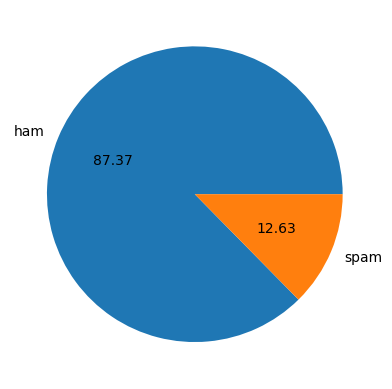

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#create 3 new columns to store number of characters, words and sentences in each sms
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

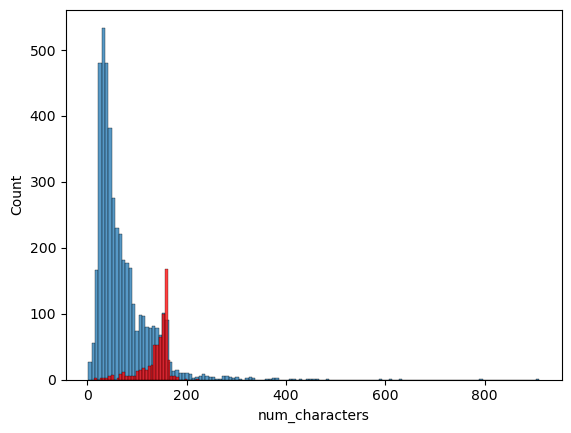

In [34]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

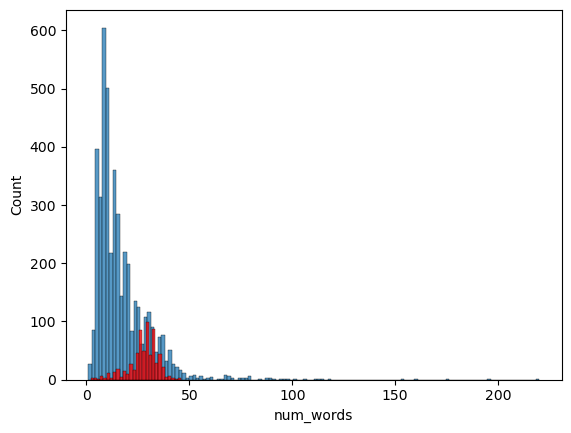

In [35]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

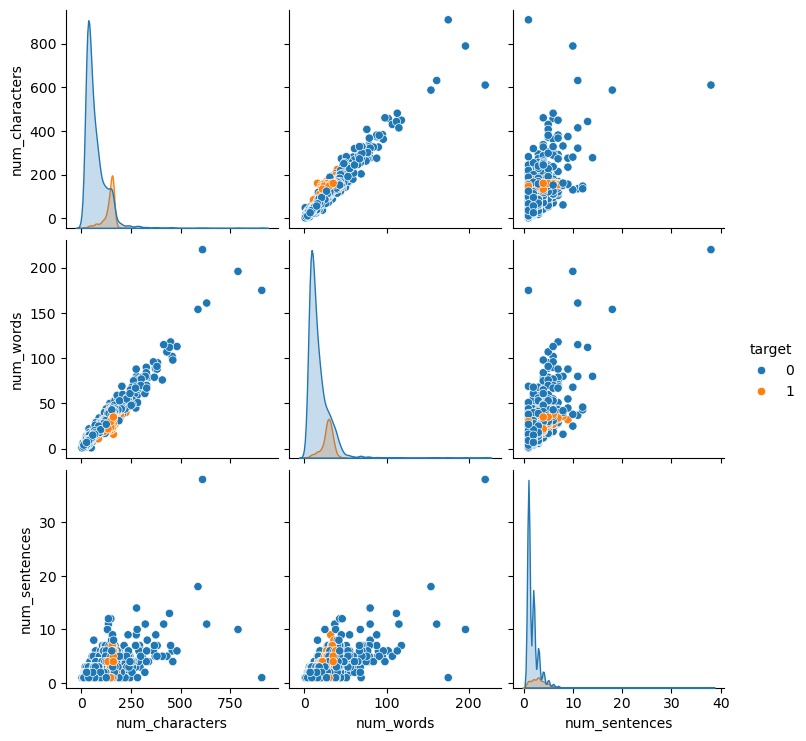

In [36]:
sns.pairplot(df, hue='target')

<Axes: >

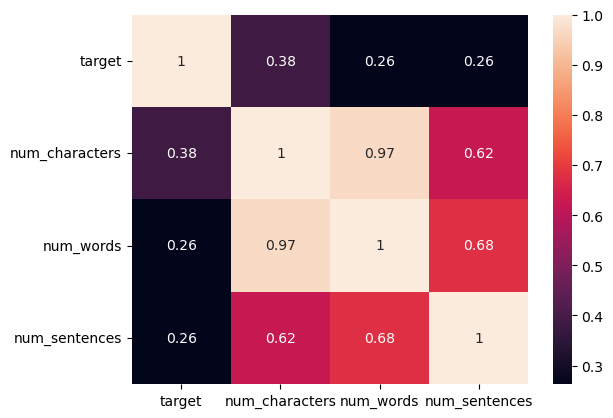

In [37]:
#Check corelations
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(), annot=True)

In [38]:
#We can see there is high correlation b/w num_characters and num_sentences etc. That means there is multi-co-linearlity
#Hence we will take only one, i.e. num_characters as the better correlation with target

# 3. Data Preprocessing
1. Lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuations
5. Stemming

In [40]:
from nltk.corpus import stopwords
import nltk
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer()
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] #cloning instead of direct assigning
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [41]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width= 700, height= 700, min_font_size= 10, background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

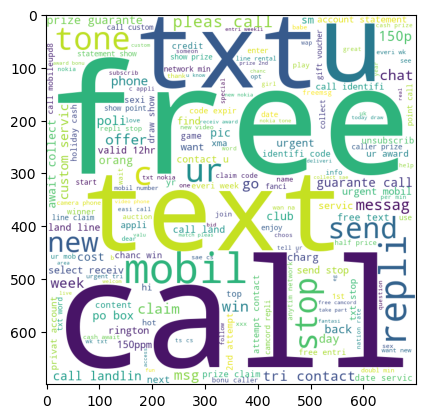

In [45]:
plt.imshow(spam_wc)

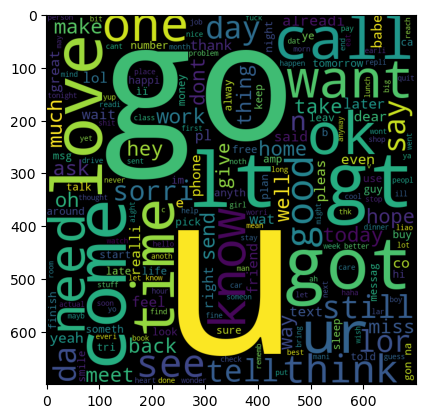

In [46]:
wc = WordCloud(width= 700, height= 700, min_font_size= 10, background_color='black')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [47]:
#Top 50 words for spam
spam_corpus = []
for sms in df[df['target'] == 1]['transformed_text'].to_list():
    for word in sms.split():
        spam_corpus.append(word)

In [48]:
len(spam_corpus)

9939

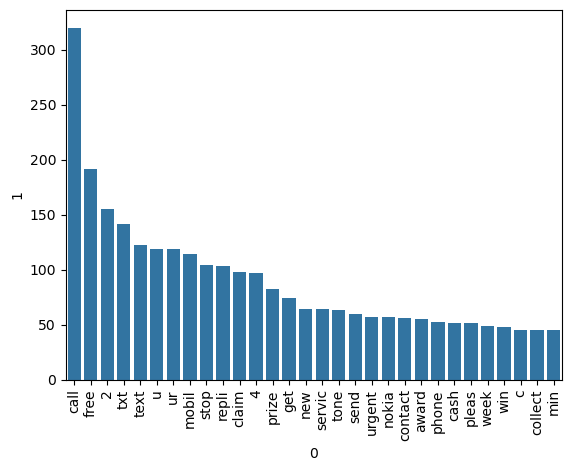

In [49]:
from collections import Counter
Counter(spam_corpus).most_common(30)
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

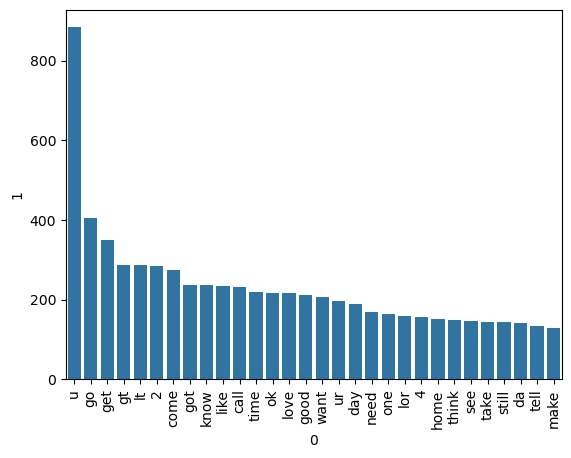

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [55]:
#text vectorization
#using BOW or TfIdf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#cv = CountVectorizer()
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000) #Considering only top 3000 tokens from 5k tokens

In [56]:
#X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 3000)

In [58]:
y = df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
#Let's prepare Training and Test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 3)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
#Spam classifier is an High Precision Model, hence precision makes more sense
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8646034816247582
[[773 121]
 [ 19 121]]
0.5


In [64]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9690522243713733
[[894   0]
 [ 32 108]]
1.0


bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

In [66]:
#Since the data is imbalanced
#Accuracy will not matter much, Precision is important
# Let's proceed with tfidf vectorizer and MNB

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [68]:
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=6)
knc = KNeighborsClassifier()
abc = AdaBoostClassifier(n_estimators=50, random_state=3)
bc = BaggingClassifier(n_estimators=50, random_state=3)
etc = ExtraTreesClassifier(n_estimators=50, random_state=3)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=3)
rfc = RandomForestClassifier(n_estimators=50, random_state=3)
xgc = XGBClassifier(n_estimators=50, random_state=3)

In [69]:
classifiers = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbc,
    'xgb':xgc
}

In [70]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9829059829059829)

In [72]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    print(name, clf)
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC SVC(gamma=1.0, kernel='sigmoid')
For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9829059829059829
KN KNeighborsClassifier()
For  KN
Accuracy -  0.9081237911025145
Precision -  1.0
NB MultinomialNB()
For  NB
Accuracy -  0.9690522243713733
Precision -  1.0
DT DecisionTreeClassifier(max_depth=6)
For  DT
Accuracy -  0.941972920696325
Precision -  0.9
LR LogisticRegression(penalty='l1', solver='liblinear')
For  LR
Accuracy -  0.9555125725338491
Precision -  0.9795918367346939
RF RandomForestClassifier(n_estimators=50, random_state=3)
For  RF
Accuracy -  0.9690522243713733
Precision -  1.0
AdaBoost AdaBoostClassifier(random_state=3)


C:\Users\parag\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.9122807017543859
BgC BaggingClassifier(n_estimators=50, random_state=3)
For  BgC
Accuracy -  0.9671179883945842
Precision -  0.9416666666666667
ETC ExtraTreesClassifier(n_estimators=50, random_state=3)
For  ETC
Accuracy -  0.9777562862669246
Precision -  1.0
GBDT GradientBoostingClassifier(n_estimators=50, random_state=3)
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9887640449438202
xgb XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_

In [73]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [74]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
2,NB,0.969052,1.000000
5,RF,0.969052,1.000000
8,ETC,0.977756,1.000000
9,GBDT,0.948743,0.988764
0,SVC,0.973888,0.982906
10,xgb,0.968085,0.981982
4,LR,0.955513,0.979592
7,BgC,0.967118,0.941667
6,AdaBoost,0.955513,0.912281


In [75]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [76]:
temp_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [77]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [78]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.908124,1.000000,0.908124,1.000000
1,NB,0.969052,1.000000,0.969052,1.000000
2,RF,0.969052,1.000000,0.969052,1.000000
3,ETC,0.977756,1.000000,0.977756,1.000000
4,GBDT,0.948743,0.988764,0.948743,0.988764
5,SVC,0.973888,0.982906,0.973888,0.982906
6,xgb,0.968085,0.981982,0.968085,0.981982
7,LR,0.955513,0.979592,0.955513,0.979592
8,BgC,0.967118,0.941667,0.967118,0.941667
9,AdaBoost,0.955513,0.912281,0.955513,0.912281


In [79]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [80]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [81]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 1.0


In [83]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [86]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9920634920634921


In [87]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [88]:
import pickle
pickle.dump(tfidf,open(r'D:\ML_2024\ML_2024\Spam Classifier\vectorizer.pkl','wb'))
pickle.dump(mnb,open(r'D:\ML_2024\ML_2024\Spam Classifier\model.pkl','wb'))

In [89]:
#For inference
# 1. Pre-process the input
# 2. Vectorize
# 3. Preddiction